In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import models
import utils

In [2]:
def bezier(p, steps=100):
    t = np.linspace(0, 1, steps).reshape(-1, 1)
    curve = np.power(1-t, 3)*p[0] + 3*np.power(1-t, 2)*t*p[1] + 3*(1-t)*np.power(t, 2)*p[2] + np.power(t, 3)*p[3]
    return curve

In [4]:
model = models.CNP((3, 16), 256, 2, 0.01)

In [5]:
model_directory = "save/learning_rate001/num_hidden_2/max_context_300/200000_5/"
state_dict = torch.load(model_directory+ "model.pt")

In [6]:
state_dict["model_state_dict"].keys()

odict_keys(['encoder.0.weight', 'encoder.0.bias', 'encoder.2.weight', 'encoder.2.bias', 'encoder.4.weight', 'encoder.4.bias', 'query.0.weight', 'query.0.bias', 'query.2.weight', 'query.2.bias', 'query.4.weight', 'query.4.bias'])

In [7]:
state_dict["model_state_dict"]["encoder.0.weight"].size()

torch.Size([256, 19])

In [8]:
model.load_state_dict(state_dict["model_state_dict"])

<All keys matched successfully>

In [9]:
model.eval()

CNP(
  (encoder): Sequential(
    (0): Linear(in_features=19, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
  )
  (query): Sequential(
    (0): Linear(in_features=259, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
  )
)

In [10]:
data = torch.load("/home/colors/Desktop/Cappuccino-Preparing-Robot-Baxter/carry_data/train5/train.pt")

In [11]:
data

{'carry_5_1.csv': tensor([[0.0000e+00, 3.6328e-01, 6.2344e-01,  ..., 1.2655e+00, 1.9175e-03,
          1.0000e+02],
         [2.8305e-04, 3.6328e-01, 6.2344e-01,  ..., 1.2655e+00, 2.3010e-03,
          1.0000e+02],
         [5.6609e-04, 3.6328e-01, 6.2344e-01,  ..., 1.2659e+00, 2.6845e-03,
          1.0000e+02],
         ...,
         [9.9943e-01, 3.6328e-01, 6.2344e-01,  ..., 1.2659e+00, 2.6845e-03,
          1.0000e+02],
         [9.9972e-01, 3.6328e-01, 6.2344e-01,  ..., 1.2659e+00, 2.6845e-03,
          1.0000e+02],
         [1.0000e+00, 3.6328e-01, 6.2344e-01,  ..., 1.2655e+00, 2.3010e-03,
          1.0000e+02]]),
 'carry_2_2.csv': tensor([[ 0.0000e+00,  2.5938e-01,  7.6484e-01,  ...,  1.2571e+00,
           7.6699e-04,  1.0000e+02],
         [ 2.5465e-04,  2.5938e-01,  7.6484e-01,  ...,  1.2575e+00,
           1.9175e-03,  1.0000e+02],
         [ 5.0929e-04,  2.5938e-01,  7.6484e-01,  ...,  1.2563e+00,
           7.6699e-04,  1.0000e+02],
         ...,
         [ 9.9949e-01,  2.5

In [12]:
data["carry_1_1.csv"].shape

torch.Size([4107, 19])

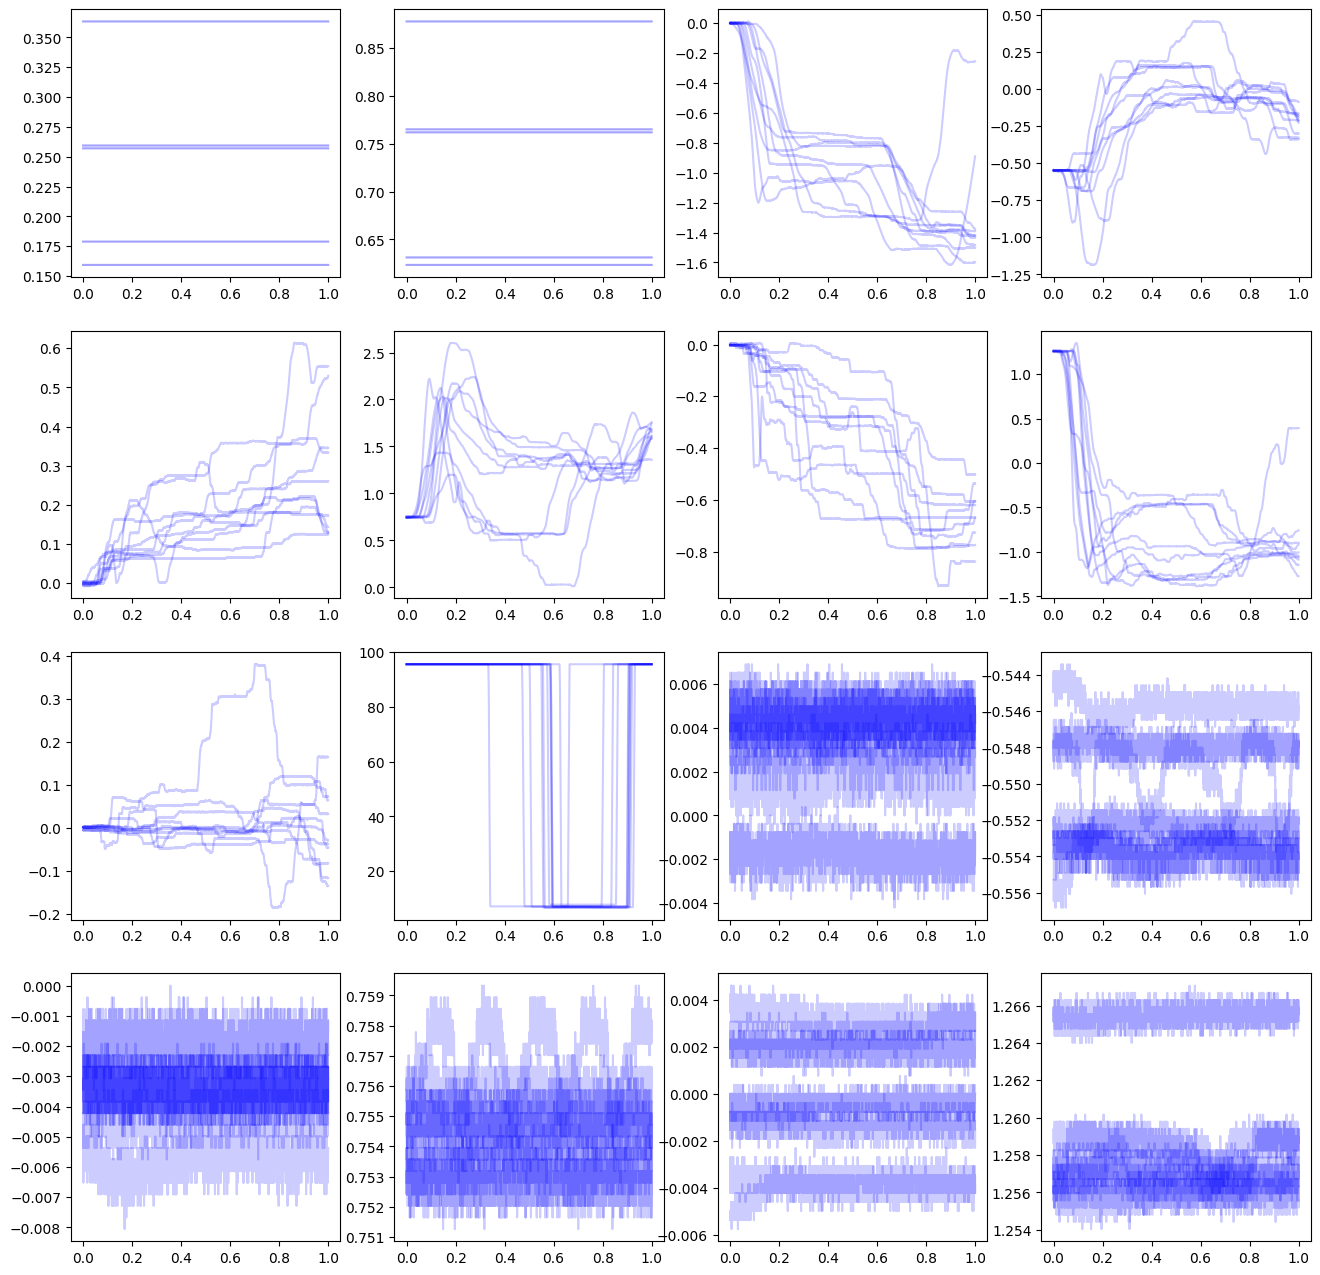

In [13]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for x in range(5):
    for y in range(2):
        for i in range(4):
            for j in range(4):
                it = i * 4 + j
                ax[i][j].plot(data[f"carry_{x+1}_{y+1}.csv"][:, 0], data[f"carry_{x+1}_{y+1}.csv"][:, it+1], c="b", alpha=0.2)
fig.savefig(model_directory + "data.png")

In [14]:
traj = data["carry_1_1.csv"]

In [15]:
traj

tensor([[0.0000e+00, 2.5703e-01, 7.6172e-01,  ..., 1.2567e+00, 1.1505e-03,
         1.0000e+02],
        [2.4355e-04, 2.5703e-01, 7.6172e-01,  ..., 1.2582e+00, 3.8350e-04,
         1.0000e+02],
        [4.8709e-04, 2.5703e-01, 7.6172e-01,  ..., 1.2579e+00, 7.6699e-04,
         1.0000e+02],
        ...,
        [9.9951e-01, 2.5703e-01, 7.6172e-01,  ..., 1.2586e+00, 3.8350e-04,
         1.0000e+02],
        [9.9976e-01, 2.5703e-01, 7.6172e-01,  ..., 1.2586e+00, 3.8350e-04,
         1.0000e+02],
        [1.0000e+00, 2.5703e-01, 7.6172e-01,  ..., 1.2594e+00, 3.8350e-04,
         1.0000e+02]])

In [16]:
traj = traj.unsqueeze(0)

In [17]:
print(traj[:, [0, 1, 2, -1, -2, -3]].shape)
print(traj[:, :, [0]].shape)

torch.Size([1, 6, 19])
torch.Size([1, 4107, 1])


In [16]:
print(traj[:, :].shape)

torch.Size([1, 4107, 19])


In [18]:
mean, std = model(observation=traj[:, :], target=traj[:, :, [0,1,2]])
mean = mean.detach()
std = std.detach()

In [19]:
observation=traj[:, [0, 1, 3000, 3001]]

In [20]:
observation.shape

torch.Size([1, 4, 19])

In [21]:
model(observation=traj[:, [0, 1, 3000, 3001]],
      target=torch.tensor([
          [
              [0.1, 0.25703125,0.76171875],
              [0.2, 0.25703125,0.76171875,],
              [0.7, 0.25703125,0.76171875,],
          ]
      ]))

(tensor([[[-3.3944e-01, -7.3560e-01,  4.3800e-02,  2.0792e+00, -5.0496e-03,
           -4.9506e-01,  2.0062e-03,  9.5633e+01,  4.4518e-03, -5.5085e-01,
           -3.7707e-03,  7.5494e-01,  1.4807e-04,  1.2581e+00,  1.0521e-03,
            1.0003e+02],
          [-7.4384e-01, -4.5203e-01,  7.1941e-02,  1.7798e+00, -1.7569e-01,
           -7.5647e-01, -6.9665e-03,  9.5614e+01,  4.5415e-03, -5.5097e-01,
           -3.8714e-03,  7.5509e-01,  2.4025e-04,  1.2582e+00,  1.1269e-03,
            1.0001e+02],
          [-1.0784e+00, -3.9843e-03,  1.7782e-01,  1.1672e+00, -4.4540e-01,
           -9.5481e-01,  4.6282e-03,  5.4531e+01,  4.5396e-03, -5.5087e-01,
           -3.7559e-03,  7.5504e-01,  7.0721e-05,  1.2579e+00,  1.2194e-03,
            1.0001e+02]]], grad_fn=<SliceBackward0>),
 tensor([[[3.2306e-01, 2.9808e-01, 4.6248e-02, 1.1635e+00, 4.7978e-02,
           1.5307e+00, 1.9054e-02, 9.6343e-02, 1.0000e-02, 1.0000e-02,
           1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02,

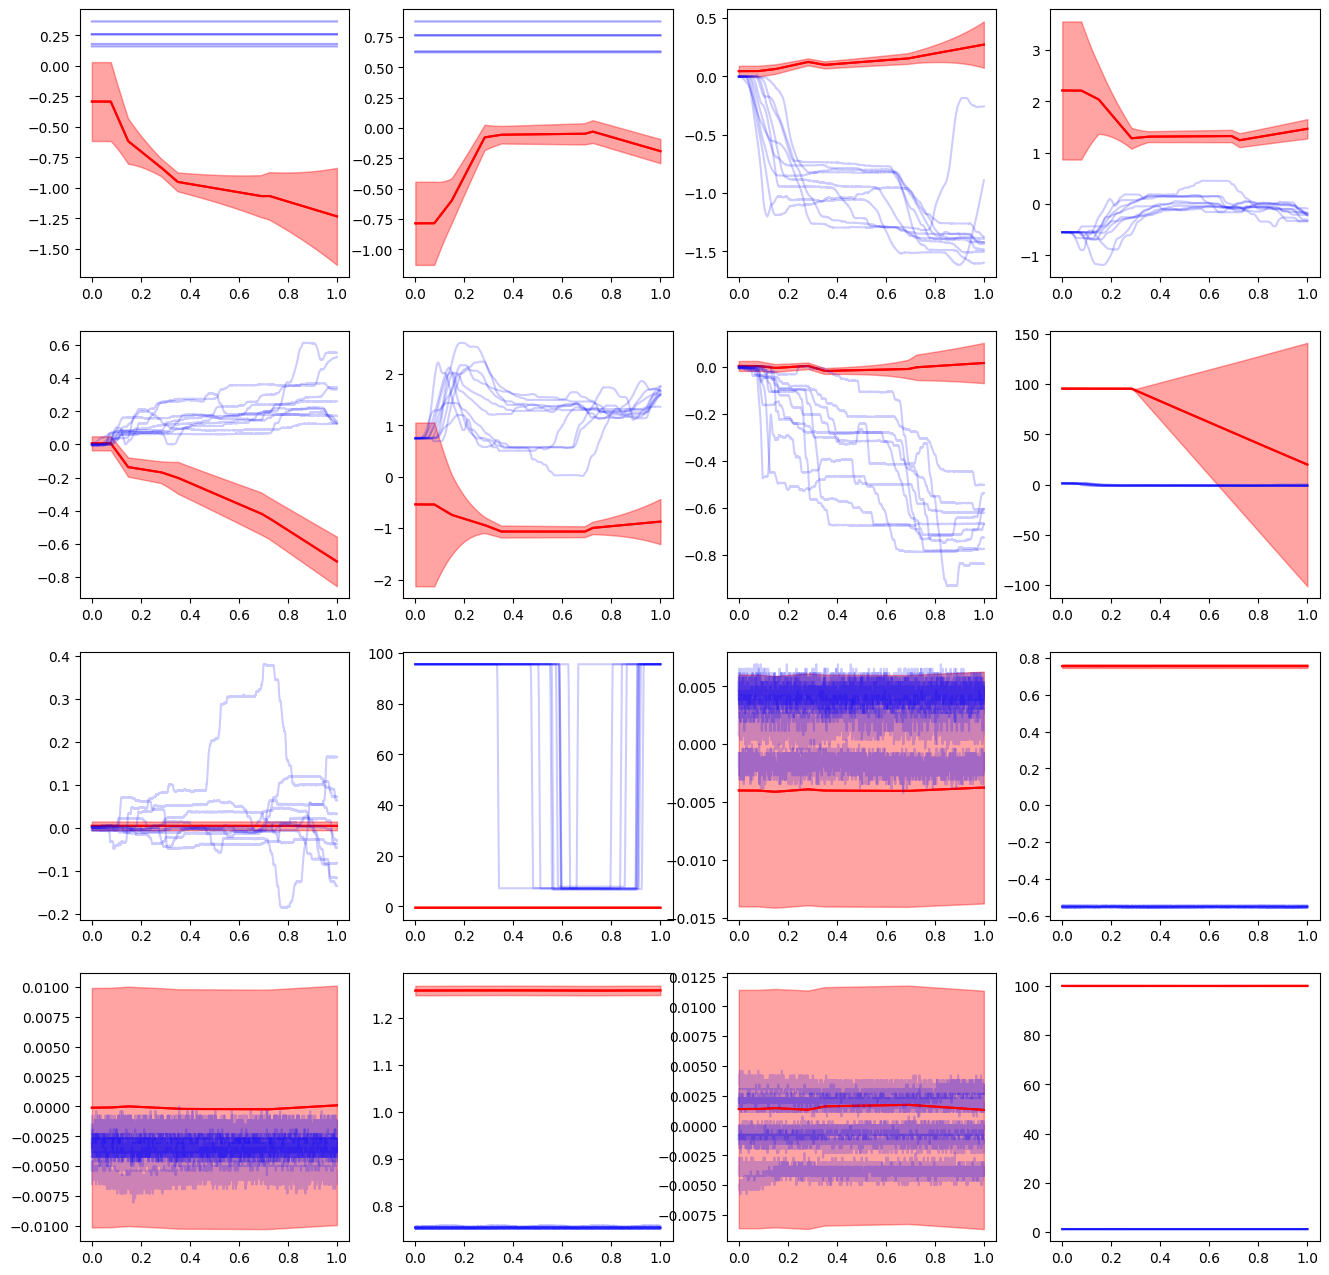

In [22]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for x in range(5):
    for y in range(2):
        for i in range(4):
            for j in range(4):
                it = i * 4 + j
                ax[i][j].plot(data[f"carry_{x+1}_{y+1}.csv"][:, 0], data[f"carry_{x+1}_{y+1}.csv"][:, it+1], c="b", alpha=0.2)
                if x == 0:
                    ax[i][j].plot(torch.linspace(0, 1, mean.shape[1]), mean[0][:, it], c="r")
                    ax[i][j].fill_between(torch.linspace(0, 1, mean.shape[1]), mean[0][:, it] - std[0][:, it],
                                        mean[0][:, it] + std[0][:, it], color="r", alpha=0.2)
fig.savefig(model_directory+"output.png")

In [17]:
test_predictions = torch.load(model_directory+"test_predictions.pt")

In [18]:
test_predictions.keys()

dict_keys(['carry_2_3.csv', 'carry_5_3.csv', 'carry_3_3.csv', 'carry_4_3.csv', 'carry_1_3.csv'])

In [22]:
test_predictions["carry_2_3.csv"].keys()

dict_keys(['mean', 'std'])